# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Price` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing pandas and numpy packages_csv

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [6]:
#reading the data
CarPrice = pd.read_csv("CarPrice_Assignment.csv")
CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
new = CarPrice["CarName"].str.split(" " , expand = True)
CarPrice["Car_Brand"]= new[0] 
CarPrice["Model"]= new[1] 
CarPrice.drop(columns =["CarName"], inplace = True) 
CarPrice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Brand,Model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [8]:
CarPrice.Car_Brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
# Correcting the spelling errors in the dataset

CarPrice['Car_Brand'] = CarPrice['Car_Brand'].str.replace('maxda', 'mazda')
CarPrice['Car_Brand'] = CarPrice['Car_Brand'].str.replace('Nissan', 'nissan')
CarPrice['Car_Brand'] = CarPrice['Car_Brand'].str.replace('porcshce', 'porsche')
CarPrice['Car_Brand'] = CarPrice['Car_Brand'].str.replace('toyouta', 'toyota')
CarPrice['Car_Brand'] = CarPrice['Car_Brand'].str.replace('vokswagen', 'volkswagen')
CarPrice['Car_Brand'] = CarPrice['Car_Brand'].str.replace('vw', 'volkswagen')
CarPrice['drivewheel'] = CarPrice['drivewheel'].str.replace('4wd', 'fwd')
CarPrice.Car_Brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
CarPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## Step 2: Visualising the Data


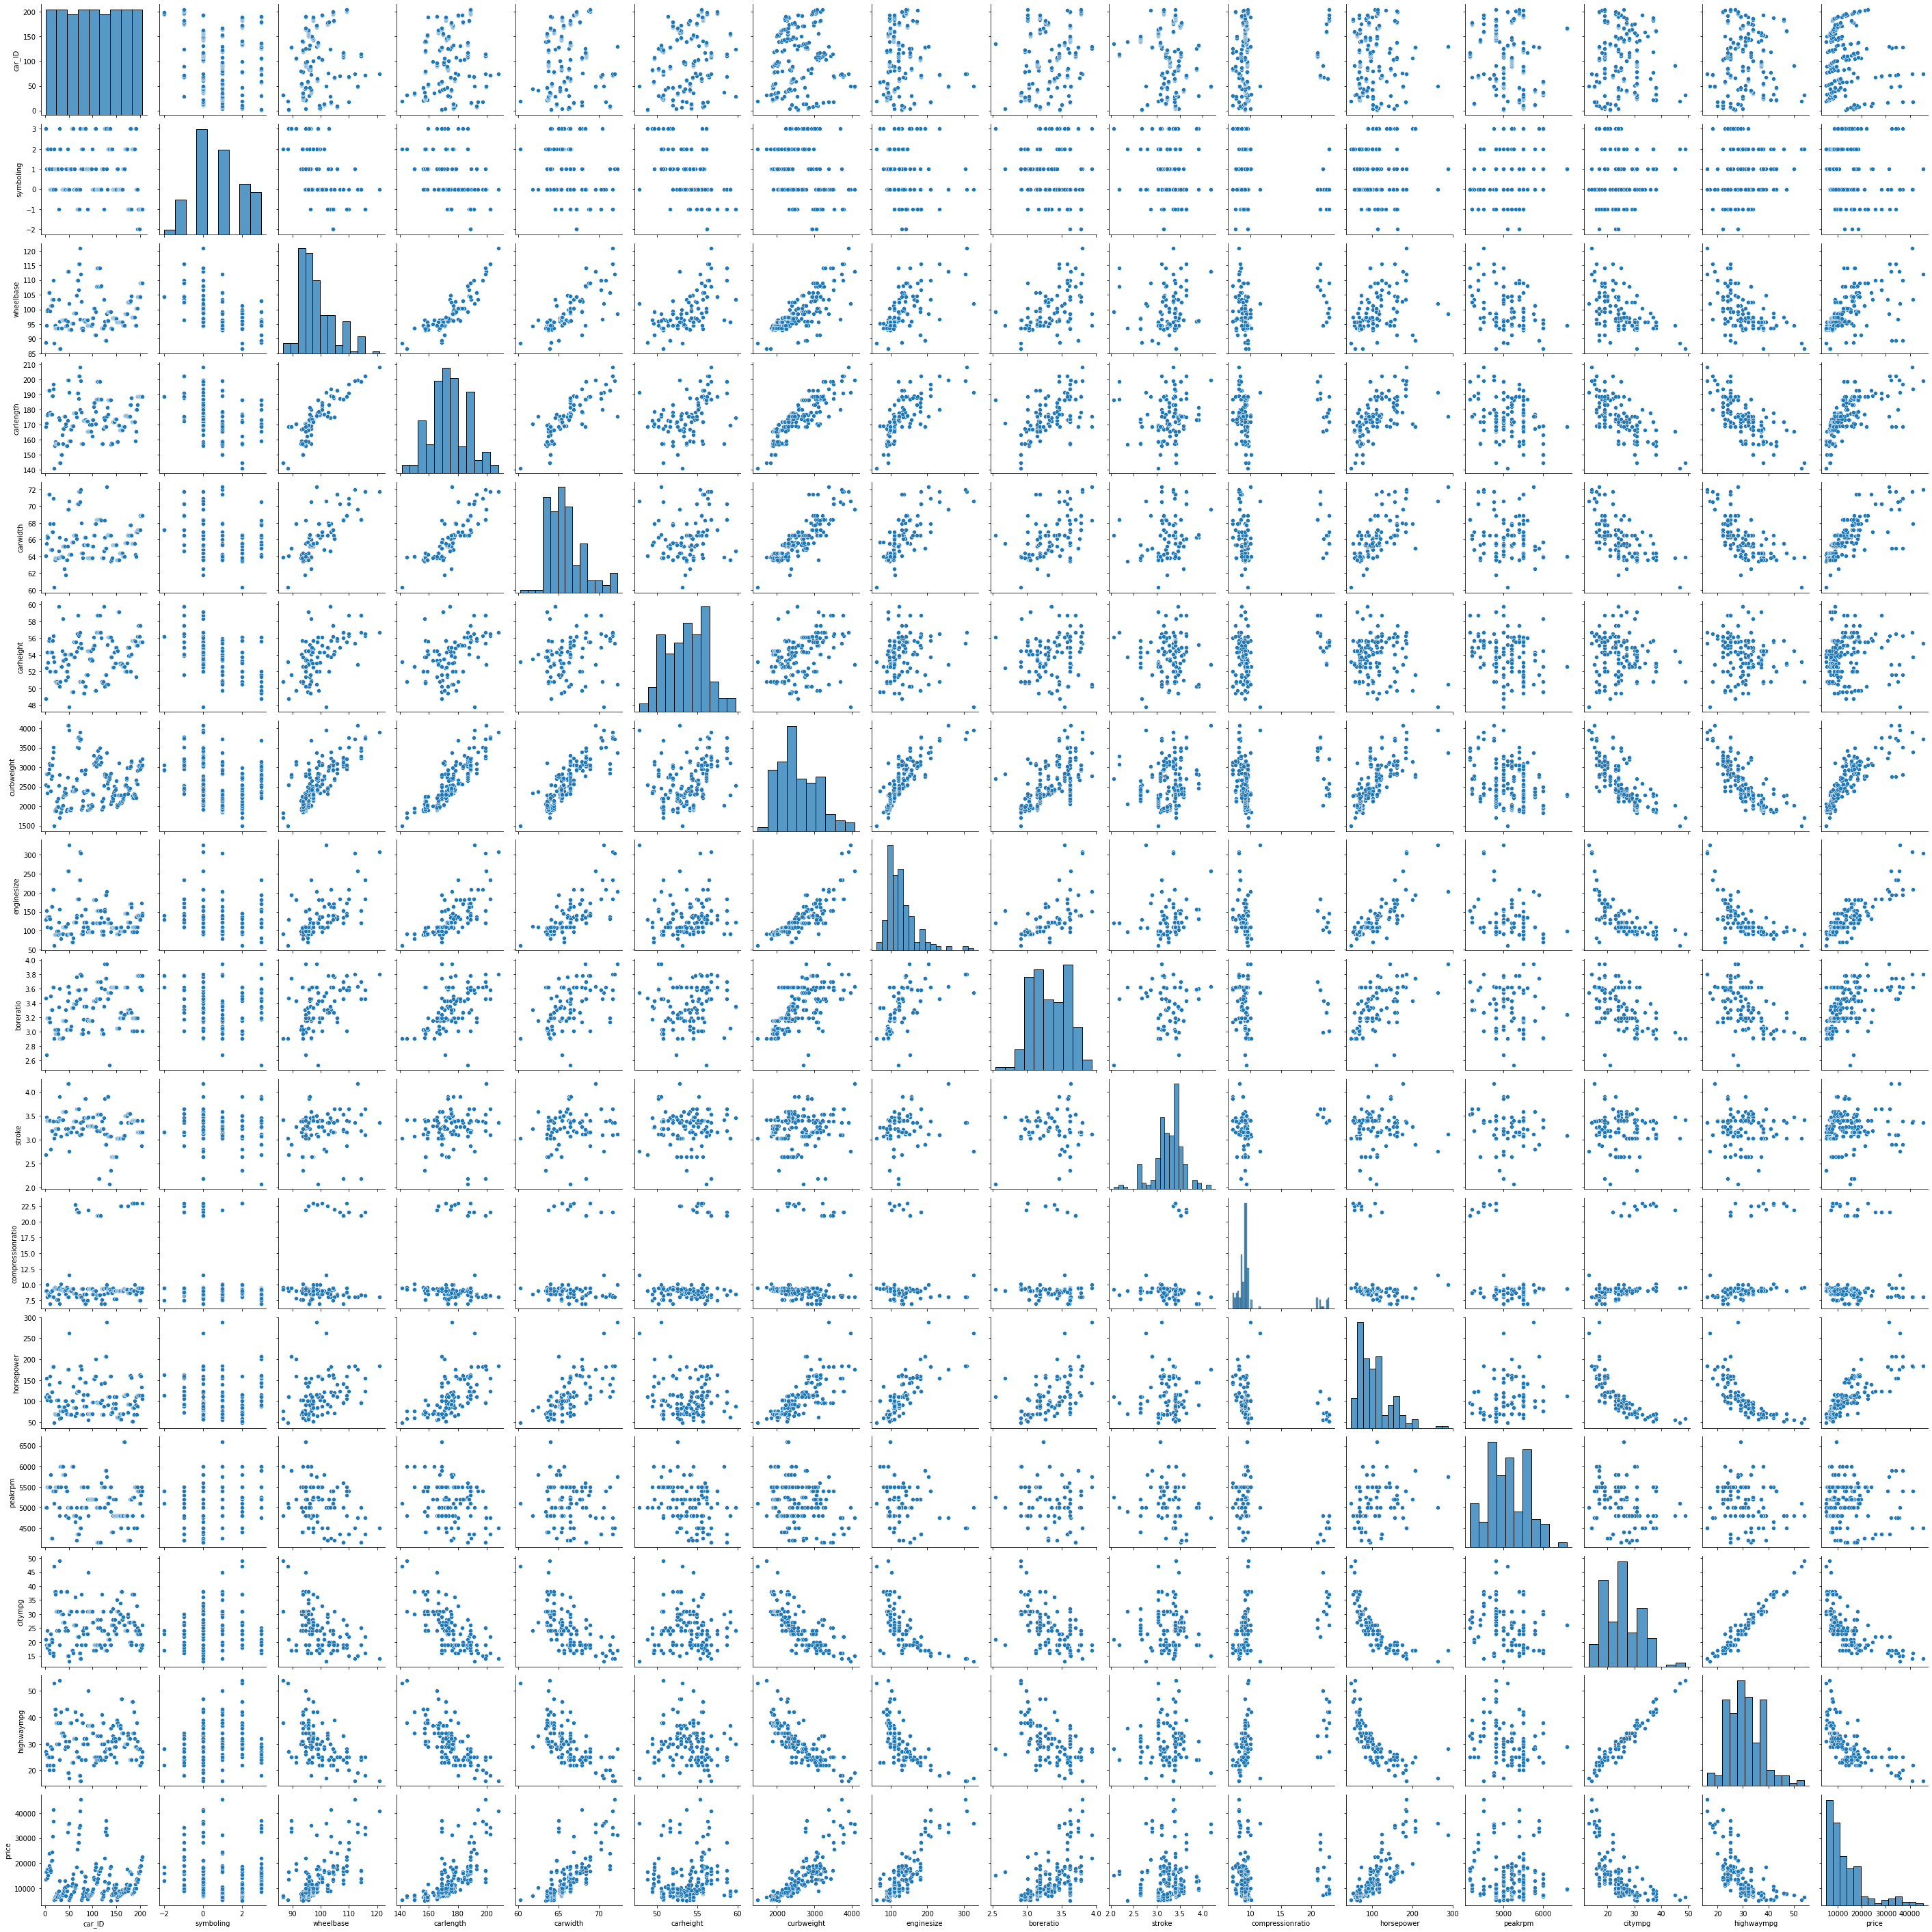

In [12]:
#visualising Numeric Variable

sns.pairplot(CarPrice)
plt.show()

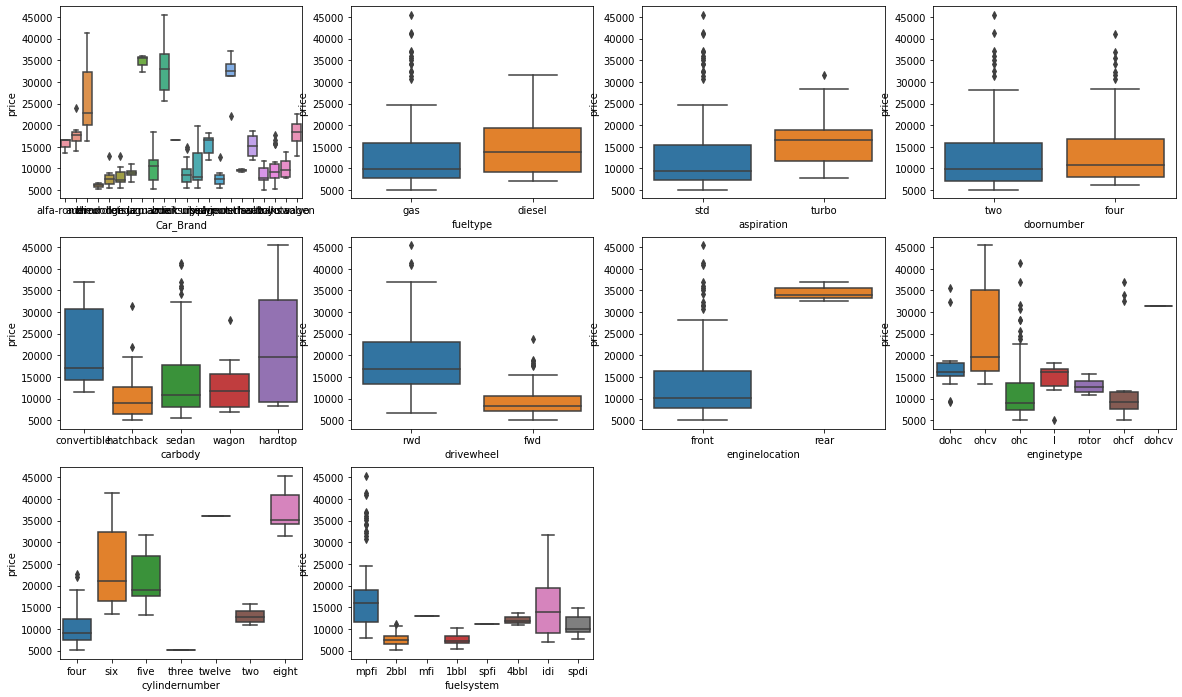

In [13]:
#visualising Cateorical Variable

plt.figure(figsize=(20, 12))
plt.subplot(3,4,1)
sns.boxplot(x = 'Car_Brand', y = 'price', data = CarPrice)
plt.subplot(3,4,2)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrice)
plt.subplot(3,4,3)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrice)
plt.subplot(3,4,4)
sns.boxplot(x = 'doornumber', y = 'price', data = CarPrice)
plt.subplot(3,4,5)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrice)
plt.subplot(3,4,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrice)
plt.subplot(3,4,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = CarPrice)
plt.subplot(3,4,8)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrice)
plt.subplot(3,4,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrice)
plt.subplot(3,4,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = CarPrice)
plt.show()

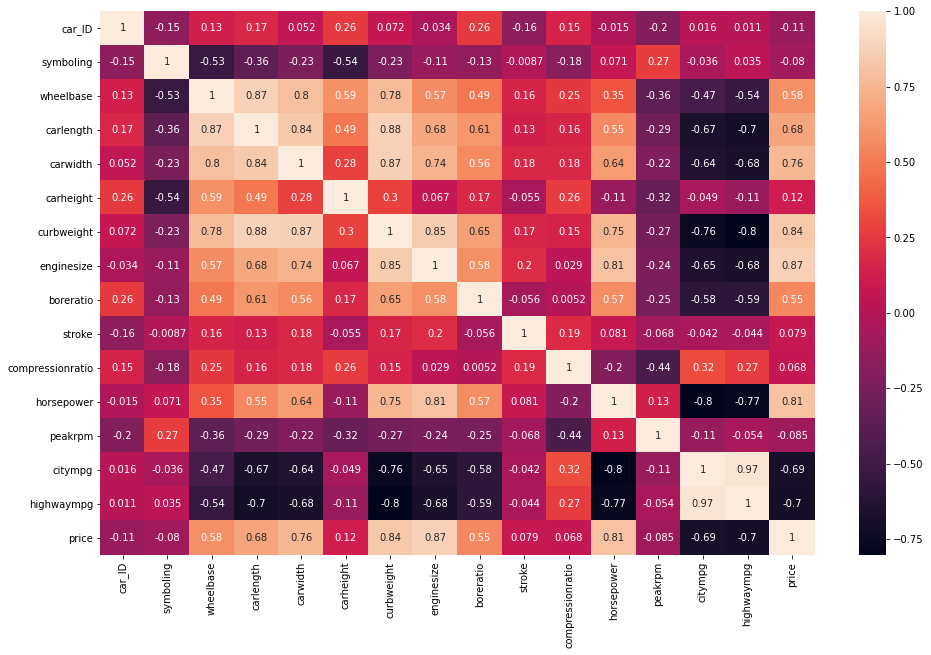

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(CarPrice.corr(),annot=True)
plt.show()

## Step 3: Data Preparation

In [15]:
# Creating Dummy Variable for all categorical  variable

symbolingdummy = pd.get_dummies(CarPrice['symboling'].astype("category"),prefix='sb',drop_first=True)
Car_Branddummy = pd.get_dummies(CarPrice['Car_Brand'],drop_first=True)
fueltypedummy = pd.get_dummies(CarPrice['fueltype'],prefix='fueltype',drop_first=True)
aspirationdummy = pd.get_dummies(CarPrice['aspiration'],prefix='asp',drop_first=True)
doornumberdummy = pd.get_dummies(CarPrice['doornumber'],prefix='doors',drop_first=True)
carbodydummy = pd.get_dummies(CarPrice['carbody'],prefix='carbody',drop_first=True)
drivewheeldummy = pd.get_dummies(CarPrice['drivewheel'],prefix='drivewheel',drop_first=True)
enginelocationdummy = pd.get_dummies(CarPrice['enginelocation'],prefix='engloc',drop_first=True)
enginetypedummy = pd.get_dummies(CarPrice['enginetype'],prefix='engtyp',drop_first=True)
cylindernumberdummy = pd.get_dummies(CarPrice['cylindernumber'],prefix='cylnum',drop_first=True)
fuelsystemdummy = pd.get_dummies(CarPrice['fuelsystem'],prefix='fuelsys',drop_first=True)

In [16]:
# Add the dummy variable to the original dataframe using concat

CarPricecon = pd.concat([Car_Branddummy,symbolingdummy,CarPrice.symboling,fueltypedummy,aspirationdummy,doornumberdummy,carbodydummy,drivewheeldummy,enginelocationdummy,CarPrice.wheelbase,CarPrice.carlength,CarPrice.carwidth,CarPrice.carheight,CarPrice.curbweight,enginetypedummy,cylindernumberdummy,CarPrice.enginesize,fuelsystemdummy,CarPrice.boreratio,CarPrice.stroke,CarPrice.compressionratio,CarPrice.horsepower,CarPrice.peakrpm,CarPrice.citympg,CarPrice.highwaympg,CarPrice.price],axis=1)
CarPricecon.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,sb_-1,sb_0,sb_1,sb_2,sb_3,symboling,fueltype_gas,asp_turbo,doors_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,engloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two,enginesize,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,0,1,0,0,0,0,1,0,88.6,168.8,64.1,48.8,2548,0,0,0,0,0,0,0,1,0,0,0,0,130,0,0,0,0,1,0,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,0,1,0,0,0,0,1,0,88.6,168.8,64.1,48.8,2548,0,0,0,0,0,0,0,1,0,0,0,0,130,0,0,0,0,1,0,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,94.5,171.2,65.5,52.4,2823,0,0,0,0,1,0,0,0,1,0,0,0,152,0,0,0,0,1,0,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,1,0,0,0,99.8,176.6,66.2,54.3,2337,0,0,1,0,0,0,0,1,0,0,0,0,109,0,0,0,0,1,0,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,1,0,0,0,99.4,176.6,66.4,54.3,2824,0,0,1,0,0,0,1,0,0,0,0,0,136,0,0,0,0,1,0,0,3.19,3.40,8.0,115,5500,18,22,17450.0


## Step 4: Splitting the Data into Training and Testing Sets


In [17]:
np.random.seed(0)
CarPrice_train, CarPrice_test = train_test_split(CarPricecon, train_size = 0.7, random_state = 100)
CarPrice_train.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,sb_-1,sb_0,sb_1,sb_2,sb_3,symboling,fueltype_gas,asp_turbo,doors_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,engloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two,enginesize,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,93.7,167.3,63.8,50.8,2191,0,0,1,0,0,0,0,1,0,0,0,0,98,1,0,0,0,0,0,0,2.97,3.23,9.4,68,5500,31,38,7609.0
125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,1,0,1,0,1,0,0,1,0,94.5,168.9,68.3,50.2,2778,0,0,1,0,0,0,0,1,0,0,0,0,151,0,0,0,0,1,0,0,3.94,3.11,9.5,143,5500,19,27,22018.0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,94.5,168.7,64.0,52.6,2300,0,0,0,0,0,0,0,1,0,0,0,0,98,0,0,0,0,1,0,0,3.24,3.08,9.4,112,6600,26,29,9538.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,0,1,0,0,0,0,1,0,88.6,168.8,64.1,48.8,2548,0,0,0,0,0,0,0,1,0,0,0,0,130,0,0,0,0,1,0,0,3.47,2.68,9.0,111,5000,21,27,16500.0
199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,-1,1,1,0,0,0,0,1,1,0,104.3,188.8,67.2,57.5,3157,0,0,1,0,0,0,0,1,0,0,0,0,130,0,0,0,0,1,0,0,3.62,3.15,7.5,162,5100,17,22,18950.0


In [18]:
CarPrice_train.shape

(143, 69)

## Step 4: Rescaling the Features 

In [19]:
scaler = MinMaxScaler()
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

CarPrice_train[num_vars] = scaler.fit_transform(CarPrice_train[num_vars])
CarPrice_train[num_vars].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131


In [20]:
CarPrice_train.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,sb_-1,sb_0,sb_1,sb_2,sb_3,symboling,fueltype_gas,asp_turbo,doors_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,engloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two,enginesize,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,0,0,1,0,0,0,0,1,0,0,0,0,0.139623,1,0,0,0,0,0,0,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,1,0,1,0,1,0,0,1,0,0.272414,0.452033,0.666667,0.212389,0.500388,0,0,1,0,0,0,0,1,0,0,0,0,0.339623,0,0,0,0,1,0,0,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0.272414,0.448780,0.308333,0.424779,0.314973,0,0,0,0,0,0,0,1,0,0,0,0,0.139623,0,0,0,0,1,0,0,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,0,1,0,0,0,0,1,0,0.068966,0.450407,0.316667,0.088496,0.411171,0,0,0,0,0,0,0,1,0,0,0,0,0.260377,0,0,0,0,1,0,0,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,-1,1,1,0,0,0,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0,0,1,0,0,0,0,1,0,0,0,0,0.260377,0,0,0,0,1,0,0,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131


In [21]:
CarPrice_train.describe()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,sb_-1,sb_0,sb_1,sb_2,sb_3,symboling,fueltype_gas,asp_turbo,doors_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,engloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two,enginesize,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.090909,0.349650,0.300699,0.118881,0.125874,0.797203,0.909091,0.181818,0.440559,0.020979,0.342657,0.475524,0.132867,0.349650,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.241351,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.288490,0.478536,0.460174,0.324786,0.332873,1.195999,0.288490,0.387050,0.498199,0.143818,0.476266,0.501156,0.340624,0.478536,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.154619,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135849,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.

### Dividing into X and Y sets for the model building


In [22]:
y_train = CarPrice_train.pop('price')
X_train = CarPrice_train

In [23]:
X_train.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,sb_-1,sb_0,sb_1,sb_2,sb_3,symboling,fueltype_gas,asp_turbo,doors_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,engloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two,enginesize,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
122,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,0,0,1,0,0,0,0,1,0,0,0,0,0.139623,1,0,0,0,0,0,0,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568
125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,1,0,1,0,1,0,0,1,0,0.272414,0.452033,0.666667,0.212389,0.500388,0,0,1,0,0,0,0,1,0,0,0,0,0.339623,0,0,0,0,1,0,0,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0.272414,0.448780,0.308333,0.424779,0.314973,0,0,0,0,0,0,0,1,0,0,0,0,0.139623,0,0,0,0,1,0,0,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,0,1,0,0,0,0,1,0,0.068966,0.450407,0.316667,0.088496,0.411171,0,0,0,0,0,0,0,1,0,0,0,0,0.260377,0,0,0,0,1,0,0,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270
199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,-1,1,1,0,0,0,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0,0,1,0,0,0,0,1,0,0,0,0,0.260377,0,0,0,0,1,0,0,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135


In [24]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

### Building model


In [25]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,18) #REF Can be changed
rfe = rfe.fit(X_train,y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('audi', False, 27),
 ('bmw', True, 1),
 ('buick', False, 35),
 ('chevrolet', False, 14),
 ('dodge', False, 9),
 ('honda', False, 12),
 ('isuzu', False, 36),
 ('jaguar', False, 18),
 ('mazda', False, 31),
 ('mercury', False, 49),
 ('mitsubishi', True, 1),
 ('nissan', False, 33),
 ('peugeot', True, 1),
 ('plymouth', False, 8),
 ('porsche', True, 1),
 ('renault', False, 43),
 ('saab', False, 6),
 ('subaru', False, 39),
 ('toyota', False, 34),
 ('volkswagen', False, 32),
 ('volvo', False, 10),
 ('sb_-1', False, 28),
 ('sb_0', False, 41),
 ('sb_1', False, 47),
 ('sb_2', False, 48),
 ('sb_3', False, 38),
 ('symboling', False, 42),
 ('fueltype_gas', False, 20),
 ('asp_turbo', False, 4),
 ('doors_two', False, 40),
 ('carbody_hardtop', False, 22),
 ('carbody_hatchback', False, 21),
 ('carbody_sedan', False, 23),
 ('carbody_wagon', False, 24),
 ('drivewheel_rwd', False, 30),
 ('engloc_rear', True, 1),
 ('wheelbase', False, 5),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', F

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['bmw', 'mitsubishi', 'peugeot', 'porsche', 'engloc_rear', 'carwidth',
       'curbweight', 'engtyp_l', 'engtyp_rotor', 'cylnum_five', 'cylnum_four',
       'cylnum_three', 'cylnum_twelve', 'cylnum_two', 'enginesize',
       'boreratio', 'stroke', 'horsepower'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'nissan', 'plymouth', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'sb_-1', 'sb_0', 'sb_1', 'sb_2',
       'sb_3', 'symboling', 'fueltype_gas', 'asp_turbo', 'doors_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_rwd', 'wheelbase', 'carlength',
       'carheight', 'engtyp_dohcv', 'engtyp_ohc', 'engtyp_ohcf', 'engtyp_ohcv',
       'cylnum_six', 'fuelsys_2bbl', 'fuelsys_4bbl', 'fuelsys_idi',
       'fuelsys_mfi', 'fuelsys_mpfi', 'fuelsys_spdi', 'fuelsys_spfi',
       'compressionratio', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [29]:
#Building model Using Statsmodel
X_train_rfe = X_train[col]
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           4.41e-71
Time:                        18:40:48   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3216      0.039     -8.265      0.000      -0.399      -0.245
bmw               0.2873      0.026     11.223      0.000       0.237       0.338
mitsubishi       -0.0623      0.020     -3.113      0.002      -0.102      -0.023
peugeot          -0.2374      0.032     -7.443      0.000      -0.300      -0.174
porsche           0.1326      0.047      2.800      0.006       0.039       0.226
engloc_rear       0.3647      0.072      5.072      0.000       0.222       0.507
carwidth          0.3427      0.060      5.691      0.000       0.224       0.462
curbweight        0.3365      0.075      4.510      0.000       0.189       0.484
engtyp_l          0.1326      0.025      5.308      0.000       0.083       0.182
engtyp_rotor      0.2545      0.032      7.872      0.000       0.191       0.319
cylnum_five       0.1816      0.033      5.507      0.000       0.116       0.247
cylnum_four       0.2704      0.040      6.712      0.000       0.191       0.350
cylnum_three      0.3699      0.051      7.247      0.000       0.269       0.471
cylnum_twelve    -0.5141      0.098     -5.232      0.000      -0.709      -0.320
cylnum_two        0.2545      0.032      7.872      0.000       0.191       0.319
enginesize        1.2758      0.153      8.322      0.000       0.972       1.579
boreratio        -0.3874      0.053     -7.330      0.000      -0.492      -0.283
stroke           -0.2576      0.045     -5.680      0.000      -0.347      -0.168
horsepower        0.1527      0.066      2.306      0.023       0.022       0.284
==============================================================================
Omnibus:                       24.964   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.876
Skew:                           0.831   Prob(JB):                     4.89e-10
Kurtosis:                       5.106   Cond. No.                     3.42e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Calculating VIF

In [30]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,cylnum_two,inf
2,peugeot,inf
7,engtyp_l,inf
8,engtyp_rotor,inf
11,cylnum_three,inf
14,enginesize,81.20
6,curbweight,57.85
5,carwidth,41.77
15,boreratio,34.90
16,stroke,31.61


### Dropping the variable and updating the model

In [31]:
X_train_rfe = X_train_rfe.drop('cylnum_two',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           4.41e-71
Time:                        18:40:48   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3216      0.039     -8.265      0.000      -0.399      -0.245
bmw               0.2873      0.026     11.223      0.000       0.237       0.338
mitsubishi       -0.0623      0.020     -3.113      0.002      -0.102      -0.023
peugeot          -0.2374      0.032     -7.443      0.000      -0.300      -0.174
porsche           0.1326      0.047      2.800      0.006       0.039       0.226
engloc_rear       0.3647      0.072      5.072      0.000       0.222       0.507
carwidth          0.3427      0.060      5.691      0.000       0.224       0.462
curbweight        0.3365      0.075      4.510      0.000       0.189       0.484
engtyp_l          0.1326      0.025      5.308      0.000       0.083       0.182
engtyp_rotor      0.5091      0.065      7.872      0.000       0.381       0.637
cylnum_five       0.1816      0.033      5.507      0.000       0.116       0.247
cylnum_four       0.2704      0.040      6.712      0.000       0.191       0.350
cylnum_three      0.3699      0.051      7.247      0.000       0.269       0.471
cylnum_twelve    -0.5141      0.098     -5.232      0.000      -0.709      -0.320
enginesize        1.2758      0.153      8.322      0.000       0.972       1.579
boreratio        -0.3874      0.053     -7.330      0.000      -0.492      -0.283
stroke           -0.2576      0.045     -5.680      0.000      -0.347      -0.168
horsepower        0.1527      0.066      2.306      0.023       0.022       0.284
==============================================================================
Omnibus:                       24.964   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.876
Skew:                           0.831   Prob(JB):                     4.89e-10
Kurtosis:                       5.106   Cond. No.                     2.61e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.54e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,peugeot,inf
7,engtyp_l,inf
11,cylnum_three,inf
13,enginesize,81.20
6,curbweight,57.85
5,carwidth,41.77
14,boreratio,34.90
15,stroke,31.61
10,cylnum_four,25.03
16,horsepower,15.29


In [33]:
X_train_rfe = X_train_rfe.drop('peugeot',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           4.41e-71
Time:                        18:40:48   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3216      0.039     -8.265      0.000      -0.399      -0.245
bmw               0.2873      0.026     11.223      0.000       0.237       0.338
mitsubishi       -0.0623      0.020     -3.113      0.002      -0.102      -0.023
porsche           0.1326      0.047      2.800      0.006       0.039       0.226
engloc_rear       0.3647      0.072      5.072      0.000       0.222       0.507
carwidth          0.3427      0.060      5.691      0.000       0.224       0.462
curbweight        0.3365      0.075      4.510      0.000       0.189       0.484
engtyp_l         -0.1048      0.026     -4.031      0.000      -0.156      -0.053
engtyp_rotor      0.5091      0.065      7.872      0.000       0.381       0.637
cylnum_five       0.1816      0.033      5.507      0.000       0.116       0.247
cylnum_four       0.2704      0.040      6.712      0.000       0.191       0.350
cylnum_three      0.6073      0.081      7.463      0.000       0.446       0.768
cylnum_twelve    -0.5141      0.098     -5.232      0.000      -0.709      -0.320
enginesize        1.2758      0.153      8.322      0.000       0.972       1.579
boreratio        -0.3874      0.053     -7.330      0.000      -0.492      -0.283
stroke           -0.2576      0.045     -5.680      0.000      -0.347      -0.168
horsepower        0.1527      0.066      2.306      0.023       0.022       0.284
==============================================================================
Omnibus:                       24.964   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.876
Skew:                           0.831   Prob(JB):                     4.89e-10
Kurtosis:                       5.106   Cond. No.                         71.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,enginesize,81.20
5,curbweight,57.85
4,carwidth,41.77
13,boreratio,34.90
14,stroke,31.61
9,cylnum_four,25.03
15,horsepower,15.29
7,engtyp_rotor,3.96
11,cylnum_twelve,2.91
8,cylnum_five,2.76


In [35]:
X_train_rfe = X_train_rfe.drop('enginesize',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     90.54
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           3.50e-60
Time:                        18:40:48   Log-Likelihood:                 192.77
No. Observations:                 143   AIC:                            -353.5
Df Residuals:                     127   BIC:                            -306.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1972      0.045     -4.428      0.000      -0.285      -0.109
bmw               0.2710      0.032      8.564      0.000       0.208       0.334
mitsubishi       -0.0529      0.025     -2.135      0.035      -0.102      -0.004
porsche           0.1235      0.059      2.105      0.037       0.007       0.240
engloc_rear       0.4404      0.088      4.979      0.000       0.265       0.615
carwidth          0.3737      0.075      5.014      0.000       0.226       0.521
curbweight        0.6142      0.083      7.425      0.000       0.451       0.778
engtyp_l         -0.1469      0.032     -4.648      0.000      -0.210      -0.084
engtyp_rotor      0.0606      0.044      1.367      0.174      -0.027       0.148
cylnum_five       0.0041      0.031      0.130      0.896      -0.058       0.066
cylnum_four       0.0248      0.034      0.728      0.468      -0.043       0.092
cylnum_three      0.3714      0.095      3.927      0.000       0.184       0.559
cylnum_twelve     0.1140      0.078      1.461      0.146      -0.040       0.268
boreratio        -0.1073      0.051     -2.123      0.036      -0.207      -0.007
stroke           -0.0159      0.043     -0.368      0.714      -0.101       0.070
horsepower        0.1199      0.082      1.462      0.146      -0.042       0.282
==============================================================================
Omnibus:                       21.506   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.970
Skew:                           0.656   Prob(JB):                     4.67e-10
Kurtosis:                       5.344   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,curbweight,45.19
4,carwidth,40.56
12,boreratio,23.20
13,stroke,17.06
14,horsepower,15.21
9,cylnum_four,11.50
2,porsche,2.25
8,cylnum_five,1.84
6,engtyp_l,1.77
3,engloc_rear,1.62


In [37]:
X_train_rfe = X_train_rfe.drop('cylnum_five',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     97.75
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           3.50e-61
Time:                        18:40:48   Log-Likelihood:                 192.76
No. Observations:                 143   AIC:                            -355.5
Df Residuals:                     128   BIC:                            -311.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1957      0.043     -4.565      0.000      -0.281      -0.111
bmw               0.2700      0.031      8.813      0.000       0.209       0.331
mitsubishi       -0.0527      0.025     -2.139      0.034      -0.101      -0.004
porsche           0.1233      0.058      2.110      0.037       0.008       0.239
engloc_rear       0.4405      0.088      4.999      0.000       0.266       0.615
carwidth          0.3765      0.071      5.307      0.000       0.236       0.517
curbweight        0.6125      0.081      7.529      0.000       0.452       0.773
engtyp_l         -0.1471      0.031     -4.673      0.000      -0.209      -0.085
engtyp_rotor      0.0588      0.042      1.402      0.163      -0.024       0.142
cylnum_four       0.0228      0.030      0.754      0.452      -0.037       0.082
cylnum_three      0.3698      0.093      3.960      0.000       0.185       0.555
cylnum_twelve     0.1143      0.078      1.471      0.144      -0.039       0.268
boreratio        -0.1066      0.050     -2.129      0.035      -0.206      -0.008
stroke           -0.0155      0.043     -0.361      0.719      -0.100       0.069
horsepower        0.1163      0.077      1.509      0.134      -0.036       0.269
==============================================================================
Omnibus:                       21.167   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.012
Skew:                           0.648   Prob(JB):                     7.54e-10
Kurtosis:                       5.318   Cond. No.                         35.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,curbweight,44.49
4,carwidth,34.19
11,boreratio,23.12
12,stroke,16.63
13,horsepower,14.12
8,cylnum_four,9.53
2,porsche,2.24
6,engtyp_l,1.74
3,engloc_rear,1.61
9,cylnum_three,1.41


In [39]:
X_train_rfe = X_train_rfe.drop('stroke',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           3.55e-62
Time:                        18:40:49   Log-Likelihood:                 192.69
No. Observations:                 143   AIC:                            -357.4
Df Residuals:                     129   BIC:                            -315.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2007      0.040     -4.965      0.000      -0.281      -0.121
bmw               0.2700      0.031      8.843      0.000       0.210       0.330
mitsubishi       -0.0543      0.024     -2.254      0.026      -0.102      -0.007
porsche           0.1239      0.058      2.127      0.035       0.009       0.239
engloc_rear       0.4392      0.088      5.005      0.000       0.266       0.613
carwidth          0.3716      0.069      5.357      0.000       0.234       0.509
curbweight        0.6054      0.079      7.692      0.000       0.450       0.761
engtyp_l         -0.1452      0.031     -4.693      0.000      -0.206      -0.084
engtyp_rotor      0.0566      0.041      1.369      0.173      -0.025       0.138
cylnum_four       0.0206      0.029      0.698      0.486      -0.038       0.079
cylnum_three      0.3649      0.092      3.962      0.000       0.183       0.547
cylnum_twelve     0.1216      0.075      1.627      0.106      -0.026       0.269
boreratio        -0.0990      0.045     -2.186      0.031      -0.189      -0.009
horsepower        0.1153      0.077      1.501      0.136      -0.037       0.267
==============================================================================
Omnibus:                       21.152   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.333
Skew:                           0.653   Prob(JB):                     1.06e-09
Kurtosis:                       5.287   Cond. No.                         32.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,curbweight,40.54
4,carwidth,29.60
11,boreratio,17.39
12,horsepower,13.85
8,cylnum_four,4.72
2,porsche,2.22
3,engloc_rear,1.57
6,engtyp_l,1.55
10,cylnum_twelve,1.22
9,cylnum_three,1.19


In [41]:
X_train_rfe = X_train_rfe.drop('cylnum_four',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     115.2
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           4.11e-63
Time:                        18:40:49   Log-Likelihood:                 192.42
No. Observations:                 143   AIC:                            -358.8
Df Residuals:                     130   BIC:                            -320.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1759      0.019     -9.185      0.000      -0.214      -0.138
bmw               0.2632      0.029      9.113      0.000       0.206       0.320
mitsubishi       -0.0500      0.023     -2.151      0.033      -0.096      -0.004
porsche           0.1280      0.058      2.214      0.029       0.014       0.242
engloc_rear       0.4229      0.084      5.010      0.000       0.256       0.590
carwidth          0.3584      0.067      5.381      0.000       0.227       0.490
curbweight        0.5860      0.073      7.977      0.000       0.441       0.731
engtyp_l         -0.1363      0.028     -4.843      0.000      -0.192      -0.081
engtyp_rotor      0.0403      0.034      1.183      0.239      -0.027       0.108
cylnum_three      0.3279      0.075      4.365      0.000       0.179       0.476
cylnum_twelve     0.1321      0.073      1.808      0.073      -0.012       0.277
boreratio        -0.0807      0.037     -2.191      0.030      -0.153      -0.008
horsepower        0.0951      0.071      1.339      0.183      -0.045       0.236
==============================================================================
Omnibus:                       21.940   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.235
Skew:                           0.666   Prob(JB):                     2.48e-10
Kurtosis:                       5.377   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,curbweight,35.57
4,carwidth,25.46
11,horsepower,12.95
10,boreratio,9.90
2,porsche,2.14
3,engloc_rear,1.57
6,engtyp_l,1.55
9,cylnum_twelve,1.22
8,cylnum_three,1.18
0,bmw,1.15


In [43]:
X_train_rfe = X_train_rfe.drop('engtyp_rotor',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           7.15e-64
Time:                        18:40:49   Log-Likelihood:                 191.65
No. Observations:                 143   AIC:                            -359.3
Df Residuals:                     131   BIC:                            -323.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1753      0.019     -9.144      0.000      -0.213      -0.137
bmw               0.2614      0.029      9.049      0.000       0.204       0.319
mitsubishi       -0.0520      0.023     -2.239      0.027      -0.098      -0.006
porsche           0.1206      0.058      2.095      0.038       0.007       0.234
engloc_rear       0.4238      0.085      5.013      0.000       0.257       0.591
carwidth          0.3618      0.067      5.429      0.000       0.230       0.494
curbweight        0.5741      0.073      7.878      0.000       0.430       0.718
engtyp_l         -0.1360      0.028     -4.825      0.000      -0.192      -0.080
cylnum_three      0.3264      0.075      4.340      0.000       0.178       0.475
cylnum_twelve     0.1273      0.073      1.742      0.084      -0.017       0.272
boreratio        -0.0777      0.037     -2.112      0.037      -0.150      -0.005
horsepower        0.1070      0.070      1.520      0.131      -0.032       0.246
==============================================================================
Omnibus:                       20.457   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.110
Skew:                           0.640   Prob(JB):                     3.22e-09
Kurtosis:                       5.219   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,curbweight,34.82
4,carwidth,25.34
10,horsepower,12.69
9,boreratio,9.82
2,porsche,2.11
3,engloc_rear,1.57
6,engtyp_l,1.55
8,cylnum_twelve,1.21
7,cylnum_three,1.18
0,bmw,1.14


In [45]:
X_train_rfe = X_train_rfe.drop('horsepower',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     136.1
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.86e-64
Time:                        18:40:49   Log-Likelihood:                 190.40
No. Observations:                 143   AIC:                            -358.8
Df Residuals:                     132   BIC:                            -326.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1776      0.019     -9.246      0.000      -0.216      -0.140
bmw               0.2678      0.029      9.324      0.000       0.211       0.325
mitsubishi       -0.0465      0.023     -2.019      0.046      -0.092      -0.001
porsche           0.1585      0.052      3.039      0.003       0.055       0.262
engloc_rear       0.4288      0.085      5.052      0.000       0.261       0.597
carwidth          0.3654      0.067      5.459      0.000       0.233       0.498
curbweight        0.6347      0.061     10.358      0.000       0.514       0.756
engtyp_l         -0.1525      0.026     -5.832      0.000      -0.204      -0.101
cylnum_three      0.3454      0.075      4.634      0.000       0.198       0.493
cylnum_twelve     0.1648      0.069      2.385      0.018       0.028       0.301
boreratio        -0.0789      0.037     -2.134      0.035      -0.152      -0.006
==============================================================================
Omnibus:                       21.371   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.035
Skew:                           0.612   Prob(JB):                     6.12e-11
Kurtosis:                       5.529   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,carwidth,25.34
5,curbweight,23.11
9,boreratio,9.77
2,porsche,1.64
3,engloc_rear,1.57
6,engtyp_l,1.33
7,cylnum_three,1.15
0,bmw,1.12
8,cylnum_twelve,1.07
1,mitsubishi,1.06


In [47]:
X_train_rfe = X_train_rfe.drop('carwidth',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.02e-59
Time:                        18:40:49   Log-Likelihood:                 175.85
No. Observations:                 143   AIC:                            -331.7
Df Residuals:                     133   BIC:                            -302.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1210      0.018     -6.784      0.000      -0.156      -0.086
bmw               0.2475      0.031      7.880      0.000       0.185       0.310
mitsubishi       -0.0490      0.025     -1.927      0.056      -0.099       0.001
porsche           0.2354      0.055      4.252      0.000       0.126       0.345
engloc_rear       0.3014      0.090      3.348      0.001       0.123       0.479
curbweight        0.9045      0.040     22.640      0.000       0.826       0.984
engtyp_l         -0.1490      0.029     -5.170      0.000      -0.206      -0.092
cylnum_three      0.2844      0.081      3.499      0.001       0.124       0.445
cylnum_twelve     0.1606      0.076      2.108      0.037       0.010       0.311
boreratio        -0.0737      0.041     -1.809      0.073      -0.154       0.007
==============================================================================
Omnibus:                       21.249   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.309
Skew:                          -0.209   Prob(JB):                     6.08e-23
Kurtosis:                       7.123   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,curbweight,8.38
8,boreratio,8.26
2,porsche,1.62
3,engloc_rear,1.50
5,engtyp_l,1.32
6,cylnum_three,1.15
0,bmw,1.09
7,cylnum_twelve,1.07
1,mitsubishi,1.06


In [49]:
X_train_rfe = X_train_rfe.drop('boreratio',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           4.26e-60
Time:                        18:40:49   Log-Likelihood:                 174.11
No. Observations:                 143   AIC:                            -330.2
Df Residuals:                     134   BIC:                            -303.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1402      0.014     -9.712      0.000      -0.169      -0.112
bmw               0.2452      0.032      7.748      0.000       0.183       0.308
mitsubishi       -0.0487      0.026     -1.900      0.060      -0.099       0.002
porsche           0.2058      0.053      3.859      0.000       0.100       0.311
engloc_rear       0.3081      0.091      3.397      0.001       0.129       0.487
curbweight        0.8641      0.033     25.885      0.000       0.798       0.930
engtyp_l         -0.1562      0.029     -5.423      0.000      -0.213      -0.099
cylnum_three      0.2973      0.082      3.642      0.000       0.136       0.459
cylnum_twelve     0.1682      0.077      2.192      0.030       0.016       0.320
==============================================================================
Omnibus:                       15.801   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.805
Skew:                          -0.062   Prob(JB):                     2.80e-13
Kurtosis:                       6.112   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,porsche,1.55
3,engloc_rear,1.50
4,curbweight,1.40
5,engtyp_l,1.32
6,cylnum_three,1.15
0,bmw,1.09
1,mitsubishi,1.05
7,cylnum_twelve,1.04


In [51]:
X_train_rfe = X_train_rfe.drop('mitsubishi',axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.97e-60
Time:                        18:40:49   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1449      0.014    -10.087      0.000      -0.173      -0.116
bmw               0.2482      0.032      7.776      0.000       0.185       0.311
porsche           0.2087      0.054      3.876      0.000       0.102       0.315
engloc_rear       0.3085      0.092      3.369      0.001       0.127       0.490
curbweight        0.8671      0.034     25.755      0.000       0.800       0.934
engtyp_l         -0.1535      0.029     -5.287      0.000      -0.211      -0.096
cylnum_three      0.2994      0.082      3.632      0.000       0.136       0.462
cylnum_twelve     0.1700      0.077      2.195      0.030       0.017       0.323
==============================================================================
Omnibus:                       14.160   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               46.339
Skew:                          -0.024   Prob(JB):                     8.66e-11
Kurtosis:                       5.788   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,porsche,1.55
2,engloc_rear,1.50
3,curbweight,1.33
4,engtyp_l,1.31
5,cylnum_three,1.15
0,bmw,1.09
6,cylnum_twelve,1.04


## Step 7: Residual Analysis of the train data


In [53]:
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           1.97e-60
Time:                        18:40:49   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1449      0.014    -10.087

In [54]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

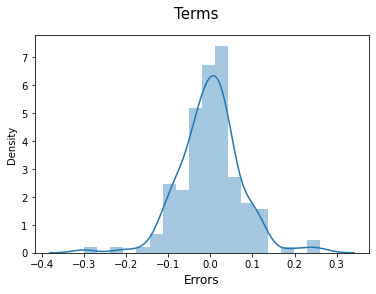

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 18)
fig.suptitle('Terms', fontsize = 15)
plt.xlabel('Errors', fontsize = 12) 

In [56]:
num_list = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

CarPrice_test[num_list] = scaler.transform(CarPrice_test[num_list])
CarPrice_test[num_list].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
160,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382
186,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295
59,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964
165,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479
140,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652


In [57]:
y_test = CarPrice_test.pop('price')
X_test = CarPrice_test

In [58]:
X_test1= X_test[X_train_rfe.columns]

X_test1 = sm.add_constant(X_test1)

In [59]:
# Making predictions
y_pred = lm.predict(X_test1)

In [60]:
r2_score(y_true=y_test,y_pred=y_pred)

0.8149978069144491